# Example use of Schramko_en_co

In [1]:
import matplotlib.pyplot as plt   # import matplotlib
import numpy as np                # import numpy

In [2]:
from Schramko_en_co import Model  # import model
mod = Model()                     # make instance of model

## Calculate dimensionless parameters

In [3]:
B     = 5000       # y lengthscale: width
L     = B          # x lengthscale
H     = 10         # depth
sigma = 1.4e-4     # tidal freqentcy
U     = 1          # tidal current ampl
g     = 10         # grav accl
alpha = 4e-6       # erosion
cd    = 0.0025     # friction
f     = 1e-4       # coriolis
p     = 0.4        # porosity
s1    = 3e-4       # bedload transport constant
mu    = 5          # horizontal eddy diffusivity
ws    = 1.3e-2     # settling velocity
kv    = 1e-2       # vertical eddy diffusivity
b1    = 2          # advective sed transport power
b2    = 2          # diffusive sed transport power

In [13]:
r            = cd * 8/(3*np.pi) * U                         # dimensional friction par 
beta_b       = (1-np.exp(-ws/kv*H))**(-1)              # deposition parameter
gamma_dep    = ws**2/kv * beta_b                    # depostion parameter
Q            = s1 * U**(b1+1)                               # typical sed transport
eps          = Q/((1-p)*H*sigma*B)                        # epsilon
Ro_inv       = (f*B)/U                                 # Rossby number      
dl_sigma     = sigma * B / U                         # dimles sigma
dl_r         = r * B / (U*H)                             # dimless r
s2           = mu * ws * beta_b * alpha / (kv * gamma_dep) # diffusive sed transport constant
Lambda_tilde = s2/s1 * U**(b2-(b1+2)) * H/B      # bed slope constant
gamma        = Ro_inv /dl_r                             # relative importance of Coriolis and frictional torque

In [14]:
print('sigma       = {}'.format(dl_sigma))
print('r           = {}'.format(dl_r))
print('Ro_inv      = {}'.format(Ro_inv))
print('s1          = {}'.format(s1))
print('s2          = {}'.format(s2))
print('tildeLambda = {}'.format(Lambda_tilde))
print('Lambda      = {}'.format(Lambda_tilde/2))
print('gamma       = {}'.format(gamma))

sigma       = 0.7
r           = 1.061032953945969
Ro_inv      = 0.5
s1          = 0.0003
s2          = 0.0015384615384615385
tildeLambda = 0.010256410256410256
Lambda      = 0.005128205128205128
gamma       = 0.4712388980384689


In [6]:
# change default parameters if you want
mod.Ro_inv = 0.6   # put to zero for no Coriolis effect

## Preferred wavenumber


In [9]:
k_pref = mod.pref_wavenumber()

--> k_pref = 2.7834532478615888


## Growth curve
Plot 3 largest growth rates $\omega_0, \omega_1, \omega_2$ vs wavember $k$.

In [7]:
k_axis = np.linspace(0,10,50)[1:] # wavenumbers
Nk = len(k_axis)

omegas = np.zeros((Nk,3))
ii = 0
for ii in range(Nk):
    omega,h = mod.eig(k_axis[ii])
    # omega is real if tide is symmetric, but mod.eig returns a value with very small imag part.
    omegas[ii] = np.real(omega[:3]) 



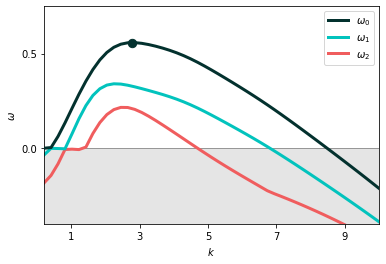

In [19]:
plt.plot(k_axis,omegas[:,0], linewidth = 3, color = '#03312E', label='$\omega_0$',zorder=3)
plt.plot(k_axis,omegas[:,1], linewidth = 3, color = '#02C3BD', label='$\omega_1$',zorder=2)
plt.plot(k_axis,omegas[:,2], linewidth = 3, color = '#F05D5E', label='$\omega_2$',zorder=1)
plt.scatter([k_pref],[np.real(mod.eig(k_pref)[0])[0]],color='#03312E',s=70,zorder=10)
plt.fill_between([0,10], [0]*2, [-0.4]*2, facecolor='k', alpha = 0.1)
plt.plot(k_axis, [0]*k_axis,'darkgray',linewidth=1,zorder=0)
plt.xticks(np.arange(1,12,2))
plt.xlim([k_axis[0],k_axis[-1]])
plt.xlabel('$k$ ')
plt.yticks([0,0.5])
plt.ylim([-0.4,0.75])
plt.ylabel('$\\omega$')
plt.legend()
plt.show()

## Plot fastest growing mode

In [10]:
#define grid
y_range = np.linspace(0,1,100)
x_range = np.linspace(0,3*np.pi/k_pref,50)
X,Y = np.meshgrid(x_range,y_range)

# calculate the eigenvector corresponding to k_pref and the corresponding residual currents in the grid x_range,y_range
eigvec, res_u, res_v = mod.h_u_v(k_pref,x_range=x_range,y_range=y_range)

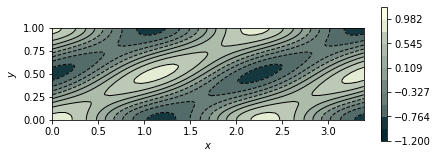

In [11]:
# make new colormap
list_of_colors = ['#002a32','#15373e','#334f51','#536b69','#697e79','#748881','#81948b','#8fa095', '#9cac9f','#adbbab','#bdc9b7','#d0dac5','#e4ecd4','#f8fee2']
from matplotlib.colors import ListedColormap
newcmp = ListedColormap(list_of_colors)
colors = np.linspace(-1.2,1.2,12)

#plot
ct = plt.contourf(X,Y,eigvec, colors, cmap=newcmp)
plt.contour(X,Y,eigvec,colors[::1],colors='k',linewidths = 1)
plt.xlim([x_range[0],x_range[-1]])
plt.xlabel('$x$')
plt.ylim([y_range[0],y_range[-1]])
plt.ylabel('$y$')
plt.gca().set_aspect('equal')
plt.colorbar(ct,fraction=0.02)
plt.show()

## Plot perturbation

--> k_pref = 2.7834532478615888


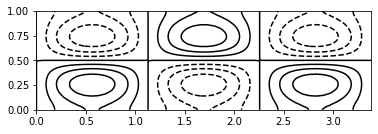

In [12]:
#calculate O(gamma) perturbation
X,Y,perturb,k = mod.perturbed_h(x_range,y_range)

#plot
plt.contour(X,Y,perturb,colors='k')
plt.gca().set_aspect('equal')
plt.show()